# Week 4 - Regression

## Types of Regression

* Simple Linear Regression
* Multiple Linear Regression
* Polynomial Regression
* Support Vector Regression
* Decision Tree Regression
* Random Forest Regression

## The Dependent Variable

* Linear Regression: y is continuous, numerical
* Linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). https://en.wikipedia.org/wiki/Linear_regression
* Scalar, a physical quantity that is completely described by its magnitude; examples of scalars are volume, density, speed, energy, mass, and time. Other quantities, such as force and velocity, have both magnitude and direction and are called vectors. https://www.britannica.com/science/scalar

# Simple Linear Regression

In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variable (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

https://en.wikipedia.org/wiki/Linear_regression

## $y = mx + b$

* $m = \frac{N * \sum{(xy)} - \sum{x}\sum{y}}{N * \sum{x^2} - (\sum{x})^2}$
* $b = \frac{\sum{y} - m * \sum{x}}{N}$

In [1]:
# https://www.mathsisfun.com/data/least-squares-regression.html
import numpy as np
import pandas as pd

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])

def xy(r):
    return r.x * r.y

m_table = pd.DataFrame({'x': x, 'y': y})
m_table['x^2'] = m_table['x'].apply(lambda x: x**2)
m_table['xy'] = m_table.apply(xy, axis=1)
print(m_table.head())

N = len(x)
sums = list(m_table.sum())
print(sums)
m = (N * sums[3] - sums[0] * sums[1]) / (N * sums[2] - sums[0]**2)
print('m:', m)
b = (sums[1]-m*sums[0])/N
print('b:', b)

   x  y  x^2  xy
0  1  1    1   1
1  2  3    4   6
2  3  2    9   6
3  4  3   16  12
4  5  5   25  25
[15, 14, 55, 50]
m: 0.8
b: 0.4


## $y=\alpha + \beta{X} + e$

* $\widehat{\alpha} = \bar{y} - \widehat{\beta} \bar{X}$
* $\widehat{\beta} = \frac{\sum{(x - \bar{x})(y - \bar{y})}}{\sum(x - \bar{x})^2}$

We have encountered one parametric equation in the form of the normal distribution. The parameters used to the plot the standard normal probability density function are the mean and the standard deviation. Here we will look at the linear regression line, another parametric equation. It looks very similar to the equation of a line. Here is the equation:
$y=\alpha + \beta{X} + e$. Recall the equation of a line looks like: $y = mx + b$. The parameters for linear regression are $\alpha$ and $\beta$ and $e$. The error term, $e$, represents the rest of $y$ that $X$ cannot explain. If we look at $y = f(X) + e$ and assume that the function of $e$ is iid, then the sum of $e$ will be zero and is usually left off of the equation. 

The sum of the residuals always equals zero (assuming that your line is actually the line of 'best fit...' The mean of residuals is also equal to zero, as the mean = the sum of the residuals / the number of items. The sum is zero, so 0/n will always equal zero.

Stephanie Glen. "Residual Values (Residuals) in Regression Analysis" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/residual/

In statistics, simple linear regression is a linear regression model with a single explanatory variable. That is, it concerns two-dimensional sample points with one independent variable and one dependent variable (conventionally, the x and y coordinates in a Cartesian coordinate system) and finds a linear function (a non-vertical straight line) that, as accurately as possible, predicts the dependent variable (y) values as a function of the independent variable (X). The adjective simple refers to the fact that the outcome variable is related to a single predictor... The goal is to find the estimated values $\widehat{\alpha }$ and $\widehat{\beta}$ for the parameters $\alpha$ and $\beta$ which would provide the 'best' fit in some sense for the data points.

https://en.wikipedia.org/wiki/Simple_linear_regression

The following plots the line of best fit. We'll break it down using the formulas for $\widehat{\alpha }$ and $\widehat{\beta}$. The points are plotted along with the line of best fit. The red lines indicate how much error there is with the actual values (the green points) and the predicted values (the black points) that forms the line of best fit.

a= 0.4 b= 0.8
x values: [1 2 3 4 5]
y values: [1 3 2 3 5]
predicted values: [1.2, 2.0, 2.8, 3.6, 4.4]


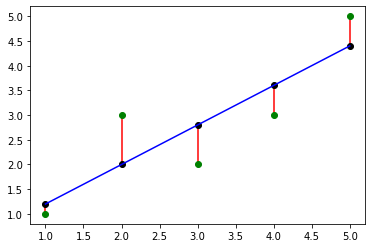

In [2]:
# plot x, y coordinates
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])

# create basic scatterplot
plt.plot(x, y, 'go',)

# obtain a and b of linear regression line
b, a = np.polyfit(x, y, 1)
print('a=', a.round(1), 'b=', b.round(1))

# predicted values
y_hat = [round(a + (b*x), 2) for x in x]
print(f'x values: {x}')
print(f'y values: {y}')
print(f'predicted values: {y_hat}')
plt.plot(x, y_hat, 'ko')

# add linear regression line to scatterplot 
plt.plot(x, a+b*x, 'b')

# ax.vlines(x,y,y)
plt.vlines(x, y, a+b*x, 'r')

plt.show()

Let's do some math and solve for $\beta$ using the formula

$\widehat{\beta} = \frac{s_{x,y}}{s^2_x} = r_{xy}\frac{s_y}{s_x} = \frac{\sum{(x - \bar{x})(y - \bar{y})}}{\sum(x - \bar{x})^2}$

where: 
* $\bar{x}$ and $\bar{y}$ are the averages of x and y
* $r_{xy}$ is the sample variance
* $s_x$ and $s_y$ are the sample standard deviation (uncorrected)
* $s_{x,y}$ and $s^2_x$ are the sample variance and sample covariance

In [3]:
# our data
X = [1, 2, 3, 4, 5]

# find the mean of X
# x_mean = (1 + 2 + 3 + 4 + 5) / 5 or using list comprehension
x_mean = sum(i for i in x) / len(x)

#print x_mean
x_mean

3.0

In [4]:
# print the mean of y
y = [1, 3, 2, 3, 5]
y_mean = sum(i for i in y) / len(y)
y_mean

2.8

Recall the $\beta$ formula according to Wikipedia

$\widehat{\beta} = \frac{\sum{(x - \bar{x})(y - \bar{y})}}{\sum(x - \bar{x})^2}$

So, solving for the numerator of $\widehat{\beta}$ we would use: $\sum(x-\bar{x})(y-\bar{y})$

Since the dataset is small we can do something like this: <br />
((1 - 3) * (1 - 2.8)) +<br />
((2 - 3) * (3 - 2.8)) +<br />
((3 - 3) * (2 - 2.8)) +<br />
((4 - 3) * (3 - 2.8)) +<br />
((5 - 3) * (5 - 2.8)) = 8

In [5]:
# print the numerator the pythonic way
numerator = sum([(i - x_mean) * (j - y_mean) for i, j in zip(x, y)])
numerator

8.0

Recall the $\beta$ formula according to Wikipedia

$\widehat{\beta} = \frac{\sum{(x - \bar{x})(y - \bar{y})}}{\sum(x - \bar{x})^2}$

So, solving for the denominator of $\widehat{\beta}$ we would use: $\sum(x - \bar{x})^2$

In [6]:
# get the denominator
denominator = sum((i - x_mean)**2 for i in x)
denominator

10.0

So, $\beta$, or specifically $\widehat{\beta}$, is equal to the numerator divided by the denominator

In [7]:
beta = numerator / denominator
beta

0.8

To find $\alpha$ we use the formula $\widehat{\alpha} = \bar{y} - \beta \bar{x}$

In [8]:
# calculate alpha
alpha = round(y_mean - (beta * x_mean), 2)
alpha

0.4

$y = a + \beta X$

Our linear regression equation is solved: <br />
y = 0.4 + 0.8(X)

## Least Squares

The method of least squares is a standard approach in regression analysis to approximate the solution of overdetermined systems (sets of equations in which there are more equations than unknowns) by minimizing the sum of the squares of the residuals (a residual being: the difference between an observed value, and the fitted value provided by a model) made in the results of each individual equation.

https://en.wikipedia.org/wiki/Least_squares 

### The Constant

In linear regression you need that constants to have lines which are not constrained to pass through origin. Think of linear model y=b1x1+b2x2+.... If all xi are 0, y must be 0, you need an additional parameter to pass that constraint

https://datascience.stackexchange.com/questions/55598/why-we-add-a-constant-value-column-in-our-dataframe-sometimes

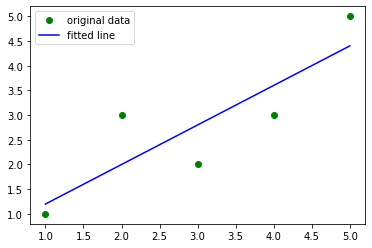

y = 0.4 + 0.8(X)


In [9]:
# using scipy
import scipy.stats as stats

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])

model = stats.linregress(x, y)

plt.plot(x, y, 'go', label='original data')
plt.plot(x, model.intercept + model.slope*x, 'b', label='fitted line')
plt.legend()
plt.show()

print(f'y = {model.intercept:.2} + {model.slope:.2}(X)')

In [10]:
# use numpy linear algebra least squares
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])

x = np.vstack([np.ones(len(x)), x]).T
a, b = np.linalg.lstsq(x, y, rcond=None)[0]
print(f'y = {a:0.1f} + {b:0.1f}X')

y = 0.4 + 0.8X


## Linear Regression with Scikit-learn

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

https://en.wikipedia.org/wiki/Scikit-learn

As mentioned, Scikit-learn provides us with a linear regression model that we can use as demonstrated in the next cell.

In [11]:
# using sklearn
from sklearn.linear_model import LinearRegression

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])
x = x.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)
print(f'y = {model.intercept_:.2} + {model.coef_[0]:.2}(X)')

y = 0.4 + 0.8(X)


### Matrix Multiplication (x = x.reshape(-1, 1))

In mathematics, particularly in linear algebra, matrix multiplication is a binary operation that produces a matrix from two matrices. For matrix multiplication, the number of columns in the first matrix must be equal to the number of rows in the second matrix. The resulting matrix, known as the matrix product, has the number of rows of the first and the number of columns of the second matrix. The product of matrices A and B is denoted as AB.

https://en.wikipedia.org/wiki/Matrix_multiplication

In [12]:
# Let's look at the x data
x = np.array([1, 2, 3, 4, 5])
x

array([1, 2, 3, 4, 5])

In [13]:
# Look at the y data
y = np.array([1, 3, 2, 3, 5])
y

array([1, 3, 2, 3, 5])

To be able to multiply two matrices, the number of columns in the first matrix must equal the number of rows in the second matrix (array).

In [14]:
# Reshape x so that the columns in x equals the number of rows in y
x = x.reshape(-1, 1)
x

array([[1],
       [2],
       [3],
       [4],
       [5]])

### Linear Algebra
* $y_i = \theta^TX_i + \epsilon_i$
* $h_\theta(x) = \theta_0 + \theta_1x_1$

https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57

In [15]:
x = np.append(arr = np.ones((5, 1)).astype(int), values = x, axis = 1)
print('weights = ', np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y))

weights =  [0.4 0.8]


### Why Matrix Multiplication?

Linear algebra is often used in data science / machine learning which includes matrix multiplication. To stay within the scope of this course we will simply say that because of the large number of features that X can potentially represent, it is more efficient to use matrix multiplication.

Because matrix multiplication is such a central operation in many numerical algorithms, much work has been invested in making matrix multiplication algorithms efficient. Applications of matrix multiplication in computational problems are found in many fields including scientific computing and pattern recognition and in seemingly unrelated problems such as counting the paths through a graph.

https://en.wikipedia.org/wiki/Matrix_multiplication_algorithm

Please review the following links to learn more:

* https://en.wikipedia.org/wiki/Linear_algebra
* https://online.stat.psu.edu/stat462/node/132/
* https://www.mathsisfun.com/algebra/matrix-multiplying.html

# Multiple Linear Regression

https://www.investopedia.com/terms/m/mlr.asp 

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 ... + \beta_n x_n + \epsilon$

where:
* y = dependent variable
* x = explanatory  variable
* $\beta_0$ = intercept
* $\beta_n$ = slope coefficients
* $\epsilon$ = the model's error term

### Assumptions of Linear Regression

* Linearity: There is a linear relationship between the independent variable and the dependent variable
* No Multicollinearity: Features should not be highly correlated
* Normality: The residuals are normally distributed
* Homoscedasticity: The residuals have an even distribution around the mean and across the spread
* Independence: There is no correlation between residuals; there is no trend, no pattern, no structure in residuals
* Time series may violate independence 
* Elements that are randomly assigned to features may violate independence
* All relevant explanatory variables must be used
* Features cannot be correlated with error term

Become familiar with the plots provided in the following links: 
* https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/
* https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html

In [16]:
# get the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

advertising = pd.read_csv('Advertising.csv', usecols=['TV', 'radio', 'newspaper', 'sales'])
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
# get info
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [18]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    advertising.drop('sales', axis=1), 
    advertising['sales'], 
    test_size=0.25, 
    random_state=42)

# Exploratory Data Analysis

In [19]:
# describe
X_train.describe()

,TV,radio,newspaper
count,150.000000,150.000000,150.000000
mean,152.958000,23.497333,30.458000
std,85.098614,14.906298,20.731383
min,0.700000,0.000000,0.300000
25%,86.350000,10.225000,12.650000
50%,164.000000,22.000000,25.900000
75%,220.325000,37.425000,45.550000
max,296.400000,49.600000,100.900000


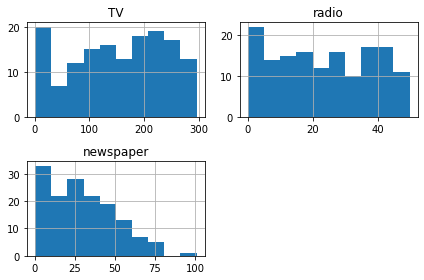

In [20]:
# histograms (univariate distribution)
import matplotlib.pyplot as plt

X_train.hist()
plt.tight_layout();

# Confidence Intervals

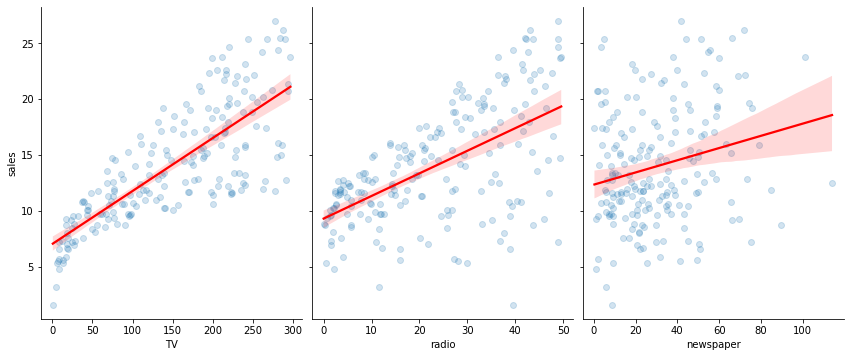

In [21]:
# scatter plots with y
import seaborn as sns

sns.pairplot(advertising, x_vars=['TV','radio','newspaper'], y_vars='sales', 
             kind='reg', 
             height=5,
             aspect=0.8, 
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.2}});

The shaded red areas represent our 95% confidence intervals. Remember our discussion of Confidence Intervals?

* Confidence intervals tend to be wider the more variability in a distribution
* Confidence intervals tend to be narrower the larger the sample size is
* Confidence intervals tend to be narrower when our accuracy is higher

Looking at the scatterplots, which of the features have linear characteristics? Which of the lines of best fit are closer to being parallel to the x axis?

# Metrics

##  MSE

In statistics, the mean squared error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss. The fact that MSE is almost always strictly positive (and not zero) is because of randomness or because the estimator does not account for information that could produce a more accurate estimate... The MSE can be written as the sum of the variance of the estimator and the squared bias of the estimator, providing a useful way to calculate the MSE and implying that in the case of unbiased estimators, the MSE and variance are equivalent.

https://en.wikipedia.org/wiki/Mean_squared_error

In datasets with a small spread all values are very close to the mean, resulting in a small variance and standard deviation. Where a dataset is more dispersed, values are spread further away from the mean, leading to a larger variance and standard deviation.

https://www.abs.gov.au/websitedbs/D3310114.nsf/home/statistical+language+-+measures+of+spread

## R Squared

* $SS_{res} = \sum{(y - \hat{y})^2}$
* $SS_{tot} = \sum{(y - \bar{y})^2}$
* $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$
* Goal is to minimize $\frac{SS_{res}}{SS_{tot}}$
* The smaller the error the larger the proportion

In statistics, the Pearson correlation coefficient ― also known as Pearson's r ― is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationship or correlation. As a simple example, one would expect the age and height of a sample of teenagers from a high school to have a Pearson correlation coefficient significantly greater than 0, but less than 1 (as 1 would represent an unrealistically perfect correlation).

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable(s).

https://en.wikipedia.org/wiki/Coefficient_of_determination

* r shows correlation between x and y
* r squared shows strength of model, the proportion of the variance y that can be explained by X in a linear regression model

## Adjusted R Squared

* $Adj R^2 = 1 - (1 - R^2)\frac{n-1}{n-p-1}$ where p = number of features and n = size of dataset
* $R^2$ will never decrease adding more features
* Adj R squared accounts for relevant features 
* Adjusted $R^2$ will be influenced by an increase of $p$

## MSE or R Squared

It is recommended to use R-Squared or rather adjusted R-Squared for evaluating the model performance of the regression models. This is primarily because R-Squared captures the fraction of variance of actual values captured by the regression model and tends to give a better picture of the quality of the regression model. Also, MSE values differ based on whether the values of the response variable are scaled or not. A better measure instead of MSE is the root mean squared error (RMSE) which takes care of the fact related to whether the values of the response variable are scaled or not.

https://vitalflux.com/mean-square-error-r-squared-which-one-to-use/

In [22]:
# create and train the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# test set prediction results
yhat = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_true=y_test, y_pred=yhat)}')
print(f'R-Squared: {r2_score(y_test, yhat)}')

MSE: 2.880023730094192
R-Squared: 0.8935163320163658


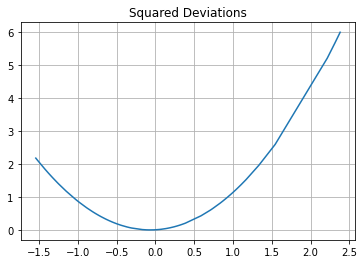

The mean of our data is -0.07.


In [23]:
# visualizing deviations from the mean squared
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm

data = norm.rvs(size=100)
x = sorted(np.array(data))
y = [(i - np.mean(x))**2 for i in x]
plt.title('Squared Deviations') 
plt.plot(x, y)
plt.grid()
plt.show()

print(f'The mean of our data is {round(np.mean(data), 2)}.')

In [24]:
d = {'TV': 232.1, 'radio': 8.6, 'newspaper': 8.7}
d = pd.Series(d)
model.predict(pd.DataFrame([d]))

array([14.99230101])

In [25]:
# view the coefficients and intercept
print(list(zip(X_train, model.coef_)))
print(model.intercept_)

[('TV', 0.045433558624649886), ('radio', 0.19145653561741383), ('newspaper', 0.002568090815700606)]
2.778303460245283


**Model.fit()**: How the model learns, trains, from the provided data to get the coefficients

**R-Squared**: The R-squared value of 90% shows that our model features have a large positive linear relationship with the outcome variable

**Interpreting a coefficient**: \\$1000 dollars on radio advertising would be associated with an increase of sales by 0.19 * 1000, or 190 units, given radio and newspaper spending stays the same.

# Statsmodels and Ordinary Least Squares

In statistics, ordinary least squares (OLS) is a type of linear least squares method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given dataset and those predicted by the linear function of the independent variable.

https://en.wikipedia.org/wiki/Ordinary_least_squares

## Adding a Constant (or Intercept)

As a rule, the constant term is always included in the set of regressors X ...

https://en.wikipedia.org/wiki/Ordinary_least_squares

The intercept (often labeled the constant) is the expected mean value of y when all X=0.

https://www.theanalysisfactor.com/interpreting-the-intercept-in-a-regression-model/

Immediately above, we saw a key reason why you should include the constant in your regression model. It guarantees that your residuals have a mean of zero. Additionally, if you don’t include the constant, the regression line is forced to go through the origin. This means that all of the predictors and the response variable must equal zero at that point. If your fitted line doesn’t naturally go through the origin, your regression coefficients and predictions will be biased if you don't include the constant.

https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-to-interpret-the-constant-y-intercept

In [26]:
import statsmodels.api as sm

X_train.insert(0, 'const', 1)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     422.2
Date:                Sat, 25 Jun 2022   Prob (F-statistic):           1.02e-71
Time:                        17:36:29   Log-Likelihood:                -289.20
No. Observations:                 150   AIC:                             586.4
Df Residuals:                     146   BIC:                             598.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7783      0.375      7.415      0.000       2.038       3.519
TV             0.0454      0.002     27.960      0.000       0.042       0.049
radio          0.1915      0.010     19.076      0.000       0.172       0.211
newspaper      0.0026      0.007      0.356      0.722      -0.012       0.017
==============================================================================
Omnibus:                       61.891   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.420
Skew:                          -1.581   Prob(JB):                     1.50e-45
Kurtosis:                       7.799   Cond. No.                         485.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OLS Regression Results Explanation

* Endog(enous): Similar to the dependent variable
* Exog(enous): Similar to the independent variable

https://www.statisticshowto.com/endogenous-variable/

### Model Info
* Dep. Varialble: the response variable, dependent, outcome, etc.
* Model: what model are we using (ordinary least squares) for the training
* Method: how the parameters (coefficients) were calculated
* No. Observations: the number of observations, rows... (n)
* DF Residuals: degrees of freedom of the residuals
* DF Model: number of parameters in the model excluding the constant if present
* Covariance Type: deals with violations of assumptions

### Goodness of Fit
* R-Squared: coefficient of determination, how well the regression fits the data
* Adj R-Squared: R-squared adjustment based on number of parameters and df residuals
* F statistic: a measure of how significant the fit is
* Prop F statistic: the probability that you would get the F stat given the null hypothesis
* Log-Liklihood: can be used to compare the fit of different coefficients, the higher valur is better
* AIC: Akaike Information Criterion is used to compare models, a lower score is better (doesn't address features, just the overall model)
* BIC: Bayesian Information Criterion is similar to AIC but uses a higher penalty

### Coefficients
* coef: the estimated value of the coefficient
* std error: the basic standard error of the estimate of the coefficient
* t: the t-statistic value, how significant the coefficient is
* P>|t|: the p-value, indicates a statistically significant relationship to the dependent variable if less than the confidence level, usually 0.05
* 95% confidence interval: the lower and upper values

### Statistical Tests
* Skewness: A measure of the symmetry of the data about the mean 
* Kurtosis: A measure of the shape of the data 
* Omnibus: D'Angostino's test provides a combined test for the presence of skewness and kurtosis
* Prob(Omnibus): probability of Omnibus
* Jarque-Bera: Another test for skewness and kurtosis
* Prob(Jarque-Bera): probability of Jarque-Bera
* Durbin-Watson: A test for the presence of autocorrelation, if the errors aren't independent
* Cond No: A test for multicollinearity

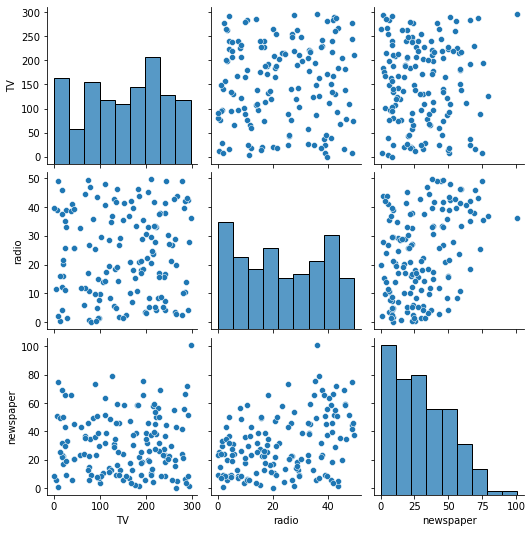

In [27]:
# pairplot checks for collinearity and homoscedasticity
# show relationships between two variables
sns.pairplot(X_train.drop('const', axis=1));

## Assumptions Check

* https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

### Partial Regression Plot

A subplot is created for each explanatory variable given by exog_idx. The partial regression plot shows the relationship between the response and the given explanatory variable after removing the effect of all other explanatory variables in exog.

https://www.statsmodels.org/devel/generated/statsmodels.graphics.regressionplots.plot_partregress_grid.html

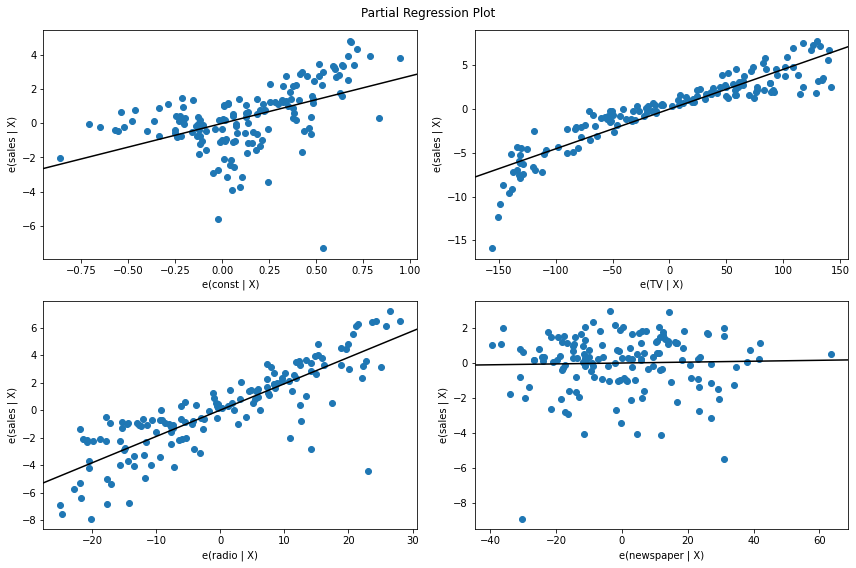

In [28]:
# https://www.kirenz.com/post/2021-11-14-linear-regression-diagnostics-in-python/linear-regression-diagnostics-in-python/
# check for linearity and homoscedasticity
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
plt.tight_layout();

### graphics.plot_regress_exog

* dependent variable and fitted values with prediction confidence intervals vs. the independent variable chosen
* the residuals of the model vs. the chosen independent variable
* a partial regression plot, and a
* CCPR plot: The CCPR (component and component-plus-residual plot) provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables.

Plot regression results against one regressor

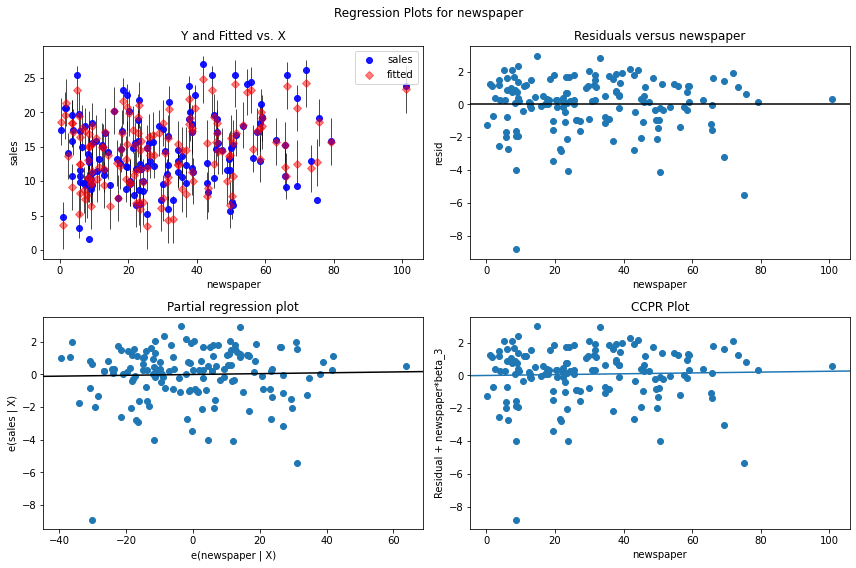

In [29]:
# ccpr checks linear relationship with the dependent variable

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'newspaper', fig=fig)
plt.tight_layout();

## More on Normality Testing

https://towardsdatascience.com/normality-testing-the-graphical-way-20902abd8543

# Feature Selection 

## Stepwise Procedures

* Backward Elimination: involves starting with all candidate variables, testing the deletion of each variable using a chosen model fit criterion, deleting the variable (if any) whose loss gives the most statistically insignificant deterioration of the model fit, and repeating this process until no further variables can be deleted without a statistically insignificant loss of fit.
* Forward Selection: involves starting with no variables in the model, testing the addition of each variable using a chosen model fit criterion, adding the variable (if any) whose inclusion gives the most statistically significant improvement of the fit, and repeating this process until none improves the model to a statistically significant extent.
* Mixed Selection: a combination of the above, testing at each step for variables to be included or excluded.

In [30]:
# get data https://www.javahabit.com/2019/02/10/part-5-ml-mltr-backward-elimination/
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dinesh19aug/ml-notes/master/Part-5-backward-elimination/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [31]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Profit'], axis=1), 
    df['Profit'], 
    test_size=0.25, 
    random_state=42)

In [32]:
# use sklearn one hot encoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto', drop='first', sparse=False)

cat_features = ['State']
ohe_train = ohe.fit_transform(X_train[cat_features])
ohe_train = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(cat_features))
ohe_train.index = X_train.index
X_train = X_train.join(ohe_train)
X_train.drop(cat_features, axis=1, inplace=True)

ohe_test = ohe.transform(X_test[cat_features])
ohe_test = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out(cat_features))
ohe_test.index = X_test.index
X_test = X_test.join(ohe_test)
X_test.drop(cat_features, axis=1, inplace=True)

print(X_train.shape)
print(X_test.shape)
print(X_train.info())

(37, 5)
(13, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 8 to 38
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        37 non-null     float64
 1   Administration   37 non-null     float64
 2   Marketing Spend  37 non-null     float64
 3   State_Florida    37 non-null     float64
 4   State_New York   37 non-null     float64
dtypes: float64(5)
memory usage: 2.8 KB
None


In [33]:
import statsmodels.api as sm

# features should have a constant or intercept
# X_train = sm.add_constant(X_train)
X_train.insert(0, 'const', 1)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     129.9
Date:                Sat, 25 Jun 2022   Prob (F-statistic):           7.82e-20
Time:                        17:36:31   Log-Likelihood:                -389.14
No. Observations:                  37   AIC:                             790.3
Df Residuals:                      31   BIC:                             799.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             5.65e+04   9705.241      5.821      0.000    3.67e+04    7.63e+04
R&D Spend           0.8108      0.055     14.860      0.000       0.700       0.922
Administration     -0.0899      0.069     -1.297      0.204      -0.231       0.051
Marketing Spend     0.0299      0.023      1.326      0.195      -0.016       0.076
State_Florida     275.3521   4144.948      0.066      0.947   -8178.325    8729.029
State_New York   -337.2775   3997.891     -0.084      0.933   -8491.031    7816.476
==============================================================================
Omnibus:                       16.694   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.904
Skew:                          -1.249   Prob(JB):                     1.06e-05
Kurtosis:                       5.935   Cond. No.                     1.80e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Backward Elimination Process

* Note Adj R-squared
* AIC
* BIC
* Note P>|t| greater than 0.05

Let's get rid of the feature with the highest P>|t| and run it again to see if anything improves

**AIC**: The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

https://en.wikipedia.org/wiki/Akaike_information_criterion

**BIC**: In statistics, the Bayesian information criterion (BIC) or Schwarz information criterion (also SIC, SBC, SBIC) is a criterion for model selection among a finite set of models; models with lower BIC are generally preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

https://en.wikipedia.org/wiki/Bayesian_information_criterion

In [34]:
model = sm.OLS(y_train, X_train.drop(['State_Florida'], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.5
Date:                Sat, 25 Jun 2022   Prob (F-statistic):           5.64e-21
Time:                        17:36:31   Log-Likelihood:                -389.14
No. Observations:                  37   AIC:                             788.3
Df Residuals:                      32   BIC:                             796.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.658e+04   9481.835      5.967      0.000    3.73e+04    7.59e+04
R&D Spend           0.8103      0.053     15.219      0.000       0.702       0.919
Administration     -0.0899      0.068     -1.317      0.197      -0.229       0.049
Marketing Spend     0.0303      0.022      1.408      0.169      -0.014       0.074
State_New York   -476.0515   3355.251     -0.142      0.888   -7310.474    6358.371
==============================================================================
Omnibus:                       16.898   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.524
Skew:                          -1.255   Prob(JB):                     7.79e-06
Kurtosis:                       5.993   Cond. No.                     1.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
model = sm.OLS(y_train, X_train.drop(['State_Florida', 'State_New York'], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sat, 25 Jun 2022   Prob (F-statistic):           3.43e-22
Time:                        17:36:31   Log-Likelihood:                -389.15
No. Observations:                  37   AIC:                             786.3
Df Residuals:                      33   BIC:                             792.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.636e+04   9219.913      6.113      0.000    3.76e+04    7.51e+04
R&D Spend           0.8093      0.052     15.571      0.000       0.704       0.915
Administration     -0.0891      0.067     -1.330      0.193      -0.225       0.047
Marketing Spend     0.0305      0.021      1.439      0.160      -0.013       0.074
==============================================================================
Omnibus:                       16.634   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.805
Skew:                          -1.244   Prob(JB):                     1.12e-05
Kurtosis:                       5.932   Cond. No.                     1.75e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model = sm.OLS(y_train, X_train.drop(['State_Florida', 'State_New York', 'Administration'], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     336.8
Date:                Sat, 25 Jun 2022   Prob (F-statistic):           3.88e-23
Time:                        17:36:31   Log-Likelihood:                -390.12
No. Observations:                  37   AIC:                             786.2
Df Residuals:                      34   BIC:                             791.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.502e+04   3549.675     12.684      0.000    3.78e+04    5.22e+04
R&D Spend           0.7838      0.049     16.042      0.000       0.685       0.883
Marketing Spend     0.0402      0.020      1.999      0.054      -0.001       0.081
==============================================================================
Omnibus:                       13.268   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.266
Skew:                          -1.085   Prob(JB):                     0.000484
Kurtosis:                       5.278   Cond. No.                     6.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
model = sm.OLS(y_train, X_train.drop(['State_Florida', 'State_New York', 'Administration', 'Marketing Spend'], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     616.8
Date:                Sat, 25 Jun 2022   Prob (F-statistic):           8.17e-24
Time:                        17:36:31   Log-Likelihood:                -392.18
No. Observations:                  37   AIC:                             788.4
Df Residuals:                      35   BIC:                             791.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.889e+04   3102.222     15.758      0.000    4.26e+04    5.52e+04
R&D Spend      0.8557      0.034     24.836      0.000       0.786       0.926
==============================================================================
Omnibus:                       14.010   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.119
Skew:                          -1.102   Prob(JB):                     0.000192
Kurtosis:                       5.499   Cond. No.                     1.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Forward Selection Process

* Note Adj r-squared
* AIC
* BIC

**AIC**: The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

https://en.wikipedia.org/wiki/Akaike_information_criterion

**BIC**: In statistics, the Bayesian information criterion (BIC) or Schwarz information criterion (also SIC, SBC, SBIC) is a criterion for model selection among a finite set of models; models with lower BIC are generally preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

https://en.wikipedia.org/wiki/Bayesian_information_criterion

In [38]:
# forward selection
model = sm.OLS(y_train, X_train[['R&D Spend']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              663.5
Date:                Sat, 25 Jun 2022   Prob (F-statistic):                    8.70e-25
Time:                        17:36:31   Log-Likelihood:                         -430.86
No. Observations:                  37   AIC:                                      863.7
Df Residuals:                      36   BIC:                                      865.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
R&D Spend      1.3166      0.051     25.758      0.000       1.213       1.420
==============================================================================
Omnibus:                        5.218   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                1.902
Skew:                          -0.043   Prob(JB):                        0.386
Kurtosis:                       1.893   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# forward selection
model = sm.OLS(y_train, X_train[['R&D Spend', 'Marketing Spend']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              519.1
Date:                Sat, 25 Jun 2022   Prob (F-statistic):                    9.63e-27
Time:                        17:36:31   Log-Likelihood:                         -422.42
No. Observations:                  37   AIC:                                      848.8
Df Residuals:                      35   BIC:                                      852.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.8340      0.115      7.258      0.000       0.601       1.067
Marketing Spend     0.1790      0.040      4.499      0.000       0.098       0.260
==============================================================================
Omnibus:                        3.294   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                1.536
Skew:                           0.061   Prob(JB):                        0.464
Kurtosis:                       2.009   Cond. No.                         8.90
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# forward selection
model = sm.OLS(y_train, X_train[['R&D Spend', 'Marketing Spend', 'Administration']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              972.9
Date:                Sat, 25 Jun 2022   Prob (F-statistic):                    5.20e-33
Time:                        17:36:31   Log-Likelihood:                         -403.16
No. Observations:                  37   AIC:                                      812.3
Df Residuals:                      34   BIC:                                      817.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.7102      0.071      9.997      0.000       0.566       0.855
Marketing Spend     0.0969      0.026      3.708      0.001       0.044       0.150
Administration      0.2897      0.037      7.892      0.000       0.215       0.364
==============================================================================
Omnibus:                        0.653   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.684
Skew:                          -0.011   Prob(JB):                        0.710
Kurtosis:                       2.334   Cond. No.                         9.79
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# forward selection
model = sm.OLS(y_train, X_train[['R&D Spend', 'Marketing Spend', 'Administration', 'State_New York']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              715.4
Date:                Sat, 25 Jun 2022   Prob (F-statistic):                    1.51e-31
Time:                        17:36:31   Log-Likelihood:                         -402.98
No. Observations:                  37   AIC:                                      814.0
Df Residuals:                      33   BIC:                                      820.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.7065      0.072      9.809      0.000       0.560       0.853
Marketing Spend     0.0964      0.026      3.646      0.001       0.043       0.150
Administration      0.2856      0.038      7.564      0.000       0.209       0.362
State_New York   2724.0444   4740.577      0.575      0.569   -6920.731    1.24e+04
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.539   Jarque-Bera (JB):                0.954
Skew:                          -0.079   Prob(JB):                        0.621
Kurtosis:                       2.229   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

AIC and BIC both are trending up 

# Regularization

* Penalizes complex models to avoid overfitting
* More on overfitting and underfitting next week

https://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/

In mathematics, statistics, finance, computer science, particularly in machine learning and inverse problems, regularization is the process of adding information in order to solve an ill-posed problem or to prevent overfitting. Regularization can be applied to objective functions in ill-posed optimization problems. The regularization term, or penalty, imposes a cost on the optimization function to make the optimal solution unique.

https://en.wikipedia.org/wiki/Regularization_(mathematics)

## Cost or Loss Function

In mathematical optimization and decision theory, a loss function or cost function (sometimes also called an error function) is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event. An optimization problem seeks to minimize a loss function. An objective function is either a loss function or its opposite (in specific domains, variously called a reward function, a profit function, a utility function, a fitness function, etc.), in which case it is to be maximized.

We often use MSE as our cost function in linear regression $mse = \frac{\sum(y-\hat{y})^2}{n}$.

https://en.wikipedia.org/wiki/Loss_function

In [42]:
# get data and train test split
import numpy as np
import pandas as pd

auto = pd.read_csv('Auto.csv', usecols=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year'])
auto = auto[(auto != '?').all(axis=1)]
auto['horsepower'] = auto['horsepower'].astype(np.int64)
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    auto.drop('mpg', axis=1), 
    auto['mpg'], 
    test_size=0.25, 
    random_state=42)

In [43]:
# remind us of the OLS coefficients
import statsmodels.api as sm

# add the constant
# X_train = sm.add_constant(X_train)
X_train.insert(0, 'const', 1)
model = sm.OLS(y_train, X_train[['const', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']]).fit()
model.params[1:]

cylinders      -0.160143
displacement    0.000373
horsepower     -0.001899
weight         -0.006457
acceleration    0.057588
year            0.762270
dtype: float64

In [44]:
# lasso example
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X_train)
y = y_train
names = auto.columns
  
lasso = Lasso(alpha=5)
lasso.fit(X, y)

d = {'Feature': names, 'Coeff': lasso.coef_}
lasso_df = pd.DataFrame(d)
print(lasso_df[1:])

        Feature     Coeff
1     cylinders -0.000000
2  displacement -0.000000
3    horsepower -0.000000
4        weight -1.670802
5  acceleration  0.000000
6          year  0.000000


## Lasso / l1 Regularization

* $\alpha = \sum|w_i|$
* Forces weak features to have zero coefficients
* Performs feature selection
* Models can be unstable (coefficients fluctuate significantly on data changes with correlated features)

In [45]:
# ridge example
from sklearn.linear_model import Ridge

X=X_train
y=y_train

ridge = Ridge(alpha=10)
ridge.fit(X,y)

d = {'Feature': names, 'Coeff': ridge.coef_}
ridge_df = pd.DataFrame(d)
print(ridge_df[1:])

        Feature     Coeff
1     cylinders -0.141583
2  displacement  0.000050
3    horsepower -0.002074
4        weight -0.006451
5  acceleration  0.056597
6          year  0.759790


## Ridge / l2 Regularization

* $\alpha = \sum w_i^2$
* Spreads out coefficients more equally
* Exposes correlated features (have similar coefficients)
* Models are more stable (coefficients don't fluctuate as much on data changes with correlated features)

# Word Problem

https://www.theanalysisfactor.com/interpreting-the-intercept-in-a-regression-model/

If your fitted line doesn’t naturally go through the origin, your regression coefficients and predictions will be biased if you don't include the constant.

https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-to-interpret-the-constant-y-intercept

In [46]:
# get data
advertising = pd.read_csv('Advertising.csv', usecols=['TV', 'radio', 'newspaper', 'sales'])
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [47]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    advertising.drop('sales', axis=1), 
    advertising['sales'], 
    test_size=0.25, 
    random_state=42)

In [48]:
# add constant and build model
import statsmodels.api as sm

# X_train = sm.add_constant(X_train)
X_train.insert(0, 'const', 1)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     422.2
Date:                Sat, 25 Jun 2022   Prob (F-statistic):           1.02e-71
Time:                        17:36:31   Log-Likelihood:                -289.20
No. Observations:                 150   AIC:                             586.4
Df Residuals:                     146   BIC:                             598.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7783      0.375      7.415      0.000       2.038       3.519
TV             0.0454      0.002     27.960      0.000       0.042       0.049
radio          0.1915      0.010     19.076      0.000       0.172       0.211
newspaper      0.0026      0.007      0.356      0.722      -0.012       0.017
==============================================================================
Omnibus:                       61.891   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.420
Skew:                          -1.581   Prob(JB):                     1.50e-45
Kurtosis:                       7.799   Cond. No.                         485.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

https://towardsdatascience.com/6-things-you-did-not-learn-in-your-data-science-course-847e8b69e272 

In [49]:
# drop newspaper
model = sm.OLS(y_train, X_train.drop('newspaper', axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     637.0
Date:                Sat, 25 Jun 2022   Prob (F-statistic):           3.81e-73
Time:                        17:36:31   Log-Likelihood:                -289.26
No. Observations:                 150   AIC:                             584.5
Df Residuals:                     147   BIC:                             593.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8245      0.350      8.059      0.000       2.132       3.517
TV             0.0454      0.002     28.043      0.000       0.042       0.049
radio          0.1928      0.009     20.848      0.000       0.175       0.211
==============================================================================
Omnibus:                       62.721   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.914
Skew:                          -1.592   Prob(JB):                     2.15e-47
Kurtosis:                       7.924   Cond. No.                         450.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# view the coefficients and intercept
print(model.params)

const    2.824519
TV       0.045433
radio    0.192821
dtype: float64


If we want to see an increase of 22 units in sales, given a unit is one million dollars, and we are spending \\$37,800 on radio advertising, how much would we need to spend on TV advertising? Note: our sales has been scaled to match units of TV and radio spending, given TV and radio units are $1000 each.

Consider this equation:

$
y = \beta_0 + \beta_1(X_1) + \beta_2(X_2)
$

To see an increase of 20 units in sales knowing that we are spending \\$37,800 on radio advertising, what do we need to spend on TV?

In [51]:
# solve for X1
intercept = model.params['const']
B1 = model.params['TV']
B2 = model.params['radio']
X2 = 37.8
print(f'y = {intercept:0.2f} +( {B1:0.2f} * X1) + ({B2:0.2f} * {X2})')

y = 2.82 +( 0.05 * X1) + (0.19 * 37.8)


# Using Linear Regression for Imputation

In [52]:
# get data
auto = pd.read_csv('Auto.csv', usecols=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'])
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5


In [53]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 18.7+ KB


In [54]:
missing_values = auto.loc[~auto['horsepower'].astype(str).str.isdigit()]
print(missing_values.head())

      mpg  cylinders  displacement horsepower  weight  acceleration
32   25.0          4          98.0          ?    2046          19.0
126  21.0          6         200.0          ?    2875          17.0
330  40.9          4          85.0          ?    1835          17.3
336  23.6          4         140.0          ?    2905          14.3
354  34.5          4         100.0          ?    2320          15.8


In [55]:
# delete rows with question mark and convert horsepower to int64
auto = auto[(auto != '?').all(axis=1)]
auto['horsepower'] = auto['horsepower'].astype(np.int64)
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 21.4 KB


In [56]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    auto.drop('horsepower', axis=1), 
    auto['horsepower'], 
    test_size=0.25, 
    random_state=42)

In [57]:
# create and train the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# test set prediction results
yhats = model.predict(missing_values.drop('horsepower', axis=1))
yhats

array([ 61.2886921 ,  96.70393766,  56.56500815, 104.53471558,
        77.09752345])

In [58]:
# get original dataset
auto = pd.read_csv('Auto.csv', usecols=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year'])
missing_values = auto.loc[~auto['horsepower'].astype(str).str.isdigit()]

for i, idx in enumerate(missing_values.index):
    auto.loc[idx, 'horsepower'] = str(round(yhats[i]))

auto['horsepower'] = auto['horsepower'].astype(np.int64)
print(auto.loc[missing_values.index])
print(auto.info())

      mpg  cylinders  displacement  horsepower  weight  acceleration  year
32   25.0          4          98.0          61    2046          19.0    71
126  21.0          6         200.0          97    2875          17.0    74
330  40.9          4          85.0          57    1835          17.3    80
336  23.6          4         140.0         105    2905          14.3    80
354  34.5          4         100.0          77    2320          15.8    81
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    int64  
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.8 KB
None


# One Hot Encoding

## Categorical Encoding

* Dummy Trap
* Labelizer
* Pandas get_dummies
* Sklearn One Hot Encoding

### Dummy Trap

The dummy variable trap is a scenario in which the independent variables become multicollinear after addition of dummy variables. The value of one variable can be predicted from the values of other variable(s).

In [59]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

pets = ['dog', 'cat', 'cat', 'dog', 'turtle', 'cat', 'cat', 'turtle', 'dog', 'cat']
le = LabelEncoder()
int_values = le.fit_transform(pets)
print('PETS')
[print(pet) for pet in pets]
print()
print('cat=0, dog=1, turtle=2')
print()
print('Label Encoder:', int_values)
print()
int_values = int_values.reshape(len(int_values), 1)
ohe = OneHotEncoder(sparse=False)
ohe = ohe.fit_transform(int_values)
print('One Hot Encoding:\nCat Dog Turtle\n', ohe)
print()
lb = LabelBinarizer()
print('Label Binarizer:\n', lb.fit_transform(int_values))

PETS
dog
cat
cat
dog
turtle
cat
cat
turtle
dog
cat

cat=0, dog=1, turtle=2

Label Encoder: [1 0 0 1 2 0 0 2 1 0]

One Hot Encoding:
Cat Dog Turtle
 [[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]

Label Binarizer:
 [[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]


In [60]:
# get data and train test split
import pandas as pd
from sklearn.model_selection import train_test_split

grades = pd.read_csv('class-grades4.csv', index_col=0)
X_train, X_test, y_train, y_test = train_test_split(grades.drop('FinalGrade', axis=1), grades['FinalGrade'], test_size=0.2, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 49 to 51
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Prefix       79 non-null     int64  
 1   Assignment1  79 non-null     float64
 2   Tutorial     79 non-null     float64
 3   Midterm      79 non-null     float64
 4   Final        79 non-null     float64
 5   TakeHome     79 non-null     object 
 6   work_status  79 non-null     object 
 7   scholarship  79 non-null     int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.6+ KB


### Pandas Get Dummies

In [61]:
print(X_test['TakeHome'].value_counts())
X_test['TakeHome'] = X_test['TakeHome'].replace('D', 'C')
print(X_test['TakeHome'].value_counts())

A    6
B    5
F    4
C    3
D    2
Name: TakeHome, dtype: int64
A    6
C    5
B    5
F    4
Name: TakeHome, dtype: int64


In [62]:
# using pandas get_dummies
import pandas as pd

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape)
print(X_test.shape)

(79, 12)
(20, 11)


### Sklearn One Hot Encoder

In [63]:
# get data and train test split
import pandas as pd
from sklearn.model_selection import train_test_split

grades = pd.read_csv('class-grades4.csv', index_col=0)
X_train, X_test, y_train, y_test = train_test_split(grades.drop('FinalGrade', axis=1), grades['FinalGrade'], test_size=0.2, random_state=42)

In [64]:
# using one hot encoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse=False)

ohe_train = ohe.fit_transform(X_train[['TakeHome', 'work_status']].dropna())
ohe_train = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(['TakeHome', 'work_status']))
ohe_train.index = X_train.index
X_train = X_train.join(ohe_train)
print(X_train.shape)
print(X_train.info())

(79, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 49 to 51
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Prefix                    79 non-null     int64  
 1   Assignment1               79 non-null     float64
 2   Tutorial                  79 non-null     float64
 3   Midterm                   79 non-null     float64
 4   Final                     79 non-null     float64
 5   TakeHome                  79 non-null     object 
 6   work_status               79 non-null     object 
 7   scholarship               79 non-null     int64  
 8   TakeHome_B                79 non-null     float64
 9   TakeHome_C                79 non-null     float64
 10  TakeHome_D                79 non-null     float64
 11  TakeHome_F                79 non-null     float64
 12  work_status_half_time     79 non-null     float64
 13  work_status_not_employed  79 non-null     float64
dtypes:

In [65]:
# ohe is already trained
ohe_test = ohe.transform(X_test[['TakeHome', 'work_status']].dropna())
ohe_test = pd.DataFrame(ohe_test, columns=ohe_train.columns)
X_test = X_test.join(ohe_test)
print(X_test.shape)

(20, 14)


## Coming Up in Week 4 - More Regressions

* Polynomial Regression
* Support Vector Regression
* Decision Tree Regression
* Random Forest Regression